# Data Science
## Como começar na Ciência de Dados
######                                                    Tiago de Morais Pereira - Maio/2022

___

In [1]:
# IMPORTAÇÕES
import numpy as np                # Numpy
import pandas as pd               # Pandas
import matplotlib.pyplot as plt   # Matplotlib
import seaborn as sns             # Seaborn

### Numpy

#### Numerical Python
- Biblioteca muito utlizada para computação científica
- Costruída com base em C, o que traz velocidade na execução
- Dados homogêneos
- Estrutura de arrays

#### Arrays

#### Criando arrays

In [2]:
array1 = np.array([0, 1, 2])
array2 = np.array([10, 20, 30])

print(array1)
print(array2)
print(array1 + array2)

[0 1 2]
[10 20 30]
[10 21 32]


#### Array bidimensional

In [3]:
array2d = np.array([[1, 2, 3],[4, 5, 6]])

print(array2d)

[[1 2 3]
 [4 5 6]]


#### Array aleatório

In [4]:
random_array = np.random.random(size = 10)

print(random_array)

[0.83044864 0.61087272 0.01022981 0.73321607 0.67505526 0.55288514
 0.15318257 0.28638719 0.36205887 0.26034206]


#### Estatísticas do array

In [6]:
maximo = np.max(random_array)
minimo = np.min(random_array)
media = np.mean(random_array)
mediana = np.median(random_array)

print(f"Maximo: {maximo}")
print(f"Minimo: {minimo}")
print(f"Média: {media}")
print(f"Mediana: {mediana}")

Maximo: 0.8304486365285768
Minimo: 0.010229813295328238
Média: 0.44746783286978725
Mediana: 0.4574720009172164


#### Ordenando array e acessando valores

In [7]:
random_array.sort()          # Ordenar um array

print(random_array)

print(random_array[0])       # Acessando o primeiro valor

print(random_array[-1])      # Acessando último valor

print(random_array[1:6])     # Acessando valores entre as posições 1 e 5 (inclusive)

print(random_array[1:])      # Acessando todos os valores a partir do segundo

[0.01022981 0.15318257 0.26034206 0.28638719 0.36205887 0.55288514
 0.61087272 0.67505526 0.73321607 0.83044864]
0.010229813295328238
0.8304486365285768
[0.15318257 0.26034206 0.28638719 0.36205887 0.55288514]
[0.15318257 0.26034206 0.28638719 0.36205887 0.55288514 0.61087272
 0.67505526 0.73321607 0.83044864]


---

### Pandas

- Biblioteca para manipulação e análise de dados

#### Abrindo um dataset no formato .csv

In [8]:
dataset = pd.read_csv("dataset.csv", index_col = 0)
dataset

,tamanho,tipo,dist_centro,vida,rodovia,ar,rio,quartos,criminalidade,idade,preco
0,258.979836,casa,50.982232,26.566123,20.117523,42.841514,0,1,66.214560,73,218.543053
1,572.320514,casa,15.838171,55.132153,8.006340,67.396325,0,7,58.033589,43,477.821438
2,515.882047,casa,33.539122,62.530447,47.445318,48.336982,0,7,37.916789,21,379.397274
3,507.534452,casa,62.797544,35.548906,0.996923,47.924842,0,0,62.411051,87,319.396318
4,302.390157,casa,67.453921,14.997247,8.476615,30.006446,1,2,76.244068,73,120.208388
...,...,...,...,...,...,...,...,...,...,...,...
495,302.790425,casa,46.004756,35.363002,57.973711,30.596408,0,1,58.347832,83,209.008503
496,489.028081,apartamento,52.032385,54.654549,66.703686,64.062854,0,2,45.626268,53,312.645250
497,164.580563,apartamento,72.875066,32.759333,91.157689,53.387633,1,0,50.805581,45,84.980587
498,639.080935,apartamento,32.637988,76.463793,34.562017,51.273768,0,5,31.496553,49,488.477663


#### Separando coluna específica

In [9]:
tamanho = dataset["tamanho"]
tamanho

0      258.979836
1      572.320514
2      515.882047
3      507.534452
4      302.390157
          ...    
495    302.790425
496    489.028081
497    164.580563
498    639.080935
499    641.797026
Name: tamanho, Length: 500, dtype: float64

#### Retirando colunas com o método loc

dataset.loc[linhas, colunas]

##### Selecione todas as linhas das colunas "tipo" e "quartos"

In [12]:
tipo_quarto = dataset.loc[:, ["tipo", "quartos"]]
tipo_quarto

,tipo,quartos
0,casa,1
1,casa,7
2,casa,7
3,casa,0
4,casa,2
...,...,...
495,casa,1
496,apartamento,2
497,apartamento,0
498,apartamento,5


##### Selecione as 10 primeiras linhas das colunas "vida" e "rio"

In [16]:
vida_rio = dataset.loc[:10, ["vida","rio"]]
vida_rio

,vida,rio
0,26.566123,0
1,55.132153,0
2,62.530447,0
3,35.548906,0
4,14.997247,1
5,33.672424,0
6,17.517628,1
7,71.926071,1
8,31.903733,0
9,55.918512,1


##### Selecione todas as colunas dos imóveis com mais de três quartos

In [17]:
mais_3_quartos = dataset.loc[dataset["quartos"] > 3, :]
mais_3_quartos

,tamanho,tipo,dist_centro,vida,rodovia,ar,rio,quartos,criminalidade,idade,preco
1,572.320514,casa,15.838171,55.132153,8.006340,67.396325,0,7,58.033589,43,477.821438
2,515.882047,casa,33.539122,62.530447,47.445318,48.336982,0,7,37.916789,21,379.397274
7,666.741258,apartamento,44.603144,71.926071,91.513882,43.077183,1,4,28.255560,36,439.779266
8,416.396989,casa,37.648054,31.903733,85.451544,46.746370,0,5,71.531668,53,320.501755
12,694.280249,apartamento,33.946702,81.950009,84.551081,61.363396,0,8,20.730264,55,424.599188
...,...,...,...,...,...,...,...,...,...,...,...
481,404.554191,casa,45.545652,70.606871,53.660751,62.300850,0,5,55.416531,20,363.086910
484,392.850877,apartamento,52.071348,40.498264,84.253451,47.260465,1,5,61.289753,63,312.941440
485,501.504322,casa,27.505222,73.668268,30.320819,74.692537,0,8,28.500020,72,455.521105
489,584.247648,casa,24.297012,61.238683,3.106813,57.589606,0,7,24.185484,51,450.618703


#### Selecionando linhas e colunas baseado nos índices

Método iloc

dataset.iloc[linhas, colunas]

##### Selecione todos os valores entre as linhas 10 e 20 (inclusive) e entre as colunas 2 e 4 (inclusive)

In [18]:
dataset_iloc = dataset.iloc[10:21, 2:5]
dataset_iloc

,dist_centro,vida,rodovia
10,77.761609,0.190697,5.233286
11,33.258893,53.516713,78.284862
12,33.946702,81.950009,84.551081
13,62.926613,10.710660,79.908215
14,60.002466,25.279927,50.847904
15,66.914449,19.774378,23.290184
16,50.448680,27.105019,84.532998
17,30.573156,62.823009,72.716281
18,61.346243,17.822961,98.076117
19,70.500541,40.401556,15.569260


#### Agrupando dados

##### Qual a média de preços de acordo com a quantidade de quartos?

In [20]:
quarto_preco = dataset.groupby(["quartos"])["preco"].mean()
quarto_preco

quartos
0    186.790292
1    229.727274
2    278.334397
3    329.619320
4    351.796280
5    364.702640
6    386.384250
7    442.069064
8    459.927949
9    489.133436
Name: preco, dtype: float64

##### Qual opreço médio de cada tipo de imóvel?

In [21]:
imovel_tamanho = dataset.groupby(["tipo"])["preco"].mean()
imovel_tamanho

tipo
apartamento    282.300408
casa           265.533241
Name: preco, dtype: float64

---

##### OK, mas como eu visualizo isso tudo?

### Matplotlib

* Biblioteca para visualização de dados

* Estrutura básica

plt.figure(figsize = (6,4))

plt.title("")

plt.ylabel("")

plt.xlabel("")

plt.show()

##### Mostre qual a média de preço dos imóveis dependendo do tipo

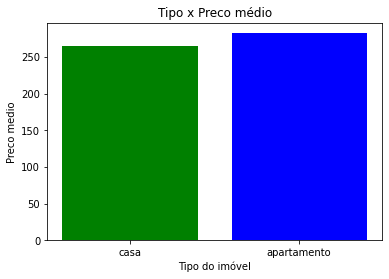

In [25]:
preco_tipo = dataset.groupby(["tipo"])["preco"].mean()

plt.figure(figsize = (6,4))
plt.title("Tipo x Preco médio")

plt.bar(x = 0, height = preco_tipo["casa"], color = "green")
plt.bar(x = 1, height = preco_tipo["apartamento"], color = "blue")

plt.ylabel("Preco medio")
plt.xlabel("Tipo do imóvel")
plt.xticks(ticks = [0, 1], labels = ["casa", "apartamento"])

plt.show()

##### Como é a distribuição dos preços?

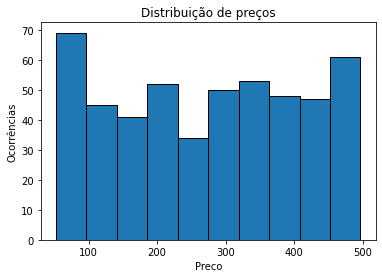

In [22]:
plt.figure(figsize = (6,4))
plt.title("Distribuição de preços")

plt.hist(dataset['preco'], edgecolor = "black")

plt.xlabel("Preco")
plt.ylabel("Ocorrências")

plt.show()

##### E a distribuição dos tamanhos?

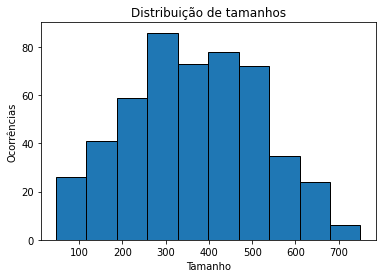

In [23]:
plt.figure(figsize = (6,4))
plt.title("Distribuição de tamanhos")

plt.hist(dataset['tamanho'], edgecolor = "black")

plt.xlabel("Tamanho")
plt.ylabel("Ocorrências")

plt.show()

##### Qual a relação entre o preço do imóvel e o seu tamanho?

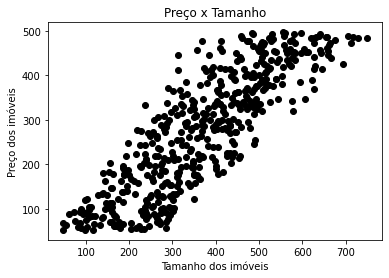

In [22]:
plt.figure(figsize = (6,4))
plt.title("Preço x Tamanho")

plt.scatter(x = dataset["tamanho"], y = dataset["preco"], c = "black")
plt.ylabel("Preço dos imóveis")
plt.xlabel("Tamanho dos imóveis")

plt.show()

##### Qual a relação entre os preços dos imóveis e a taxa de criminalidade?

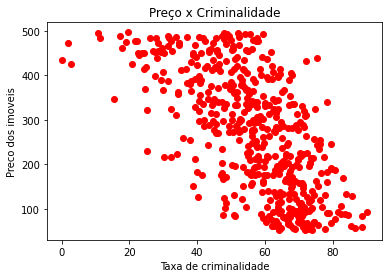

In [23]:
plt.figure(figsize = (6,4))
plt.title("Preço x Criminalidade")

plt.scatter(x = dataset["criminalidade"], y = dataset["preco"], c = "red")
plt.ylabel("Preco dos imoveis")
plt.xlabel("Taxa de criminalidade")

plt.show()

##### E a relação entre a distância para o centro e a qualidade de vida?

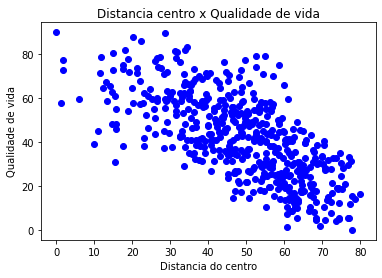

In [24]:
plt.figure(figsize = (6,4))
plt.title("Distancia centro x Qualidade de vida")

plt.scatter(x = dataset["dist_centro"], y = dataset["vida"], c = "blue")
plt.ylabel("Qualidade de vida")
plt.xlabel("Distancia do centro")

plt.show()

##### Em resumo, qual a relação entre todas as variáveis?
##### Correlação / Mapa de calor

<AxesSubplot:>

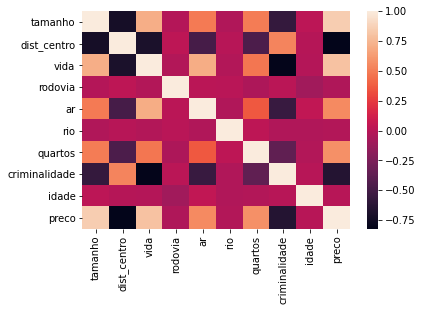

In [28]:
correlacao = dataset.corr()

sns.heatmap(correlacao)

### Machine Learning

#### Ok, fizemos uma breve análise dos dados, e agora? O que fazer?
#### Que tal construir um modelo de aprendizado de máquina que nos diga qual o valor ideal de um imóvel baseado nas suas características?
#### Vamos utilizar um modelo de regressão chamado Linear Regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

##### Escalonando dados

In [43]:
data_model = dataset.loc[:, ["tamanho", "dist_centro", "vida", "ar", "quartos", "criminalidade","preco"]]

scaler = MinMaxScaler()
scaler.fit(data_model)
data_model = scaler.transform(data_model)
data_model

array([[0.30182821, 0.6372779 , 0.29368256, ..., 0.11111111, 0.73506654,
        0.37400277],
       [0.74736108, 0.19797713, 0.61175685, ..., 0.77777778, 0.64394302,
        0.95723216],
       [0.66711234, 0.41923902, 0.69413466, ..., 0.77777778, 0.41987262,
        0.73583358],
       ...,
       [0.16760376, 0.91093832, 0.36264212, ..., 0.        , 0.56343407,
        0.07356293],
       [0.84228639, 0.40797485, 0.84927834, ..., 0.55555556, 0.34836099,
        0.98120262],
       [0.84614835, 0.36518309, 0.65886048, ..., 0.11111111, 0.54049153,
        0.99316325]])

##### Definindo variáveis de entrada, saída, treino e teste

In [50]:
x = data_model[:, :-1]
y = data_model[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

##### Criando e treinando modelo

In [51]:
modelo = LinearRegression()

modelo.fit(x_train, y_train)

LinearRegression()

##### Prevendo valor dos dados de teste

In [52]:
previsao = modelo.predict(x_test)

pontuacao = r2_score(y_test, previsao)
erro = mean_squared_error(y_test, previsao)

print(f"Pontuação: {pontuacao}")
print(f"Erro: {erro}")

Pontuação: 0.8640579220352117
Erro: 0.012066687296694517
